In [52]:
import json
import pandas as pd

# Step 1: Load JSONL data into a list
data = []
with open("avto_elon_data.jsonl", "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

# Step 2: Create DataFrame
df = pd.DataFrame(data)

# Step 3 (optional): Expand nested columns like description_params
if 'description_params' in df.columns:
    desc_df = pd.json_normalize(df['description_params'])
    df = df.drop(columns=['description_params']).join(desc_df)


In [53]:
df.drop(columns = ['phone_number'] , inplace = True)
df

,source_url,fuel_type,brand,name,price,photos,Shahar,Yili,Kuzov,Yurgani,Kraska holati,Uzatma,"Dvigatel hajmi, l",Uzatish qutisi,Kami bor,Rangi
0,https://avtoelon.uz/uz/a/show/6324919,1,Chevrolet,Labo,,[https://kluz-photos.kcdn.online/webp/f0/f0f00...,Toshkent,2025,Pikup,5 km,Kraska toza,Orqa,NaN,NaN,NaN,NaN
1,https://avtoelon.uz/uz/a/show/6310208,1,Chevrolet,"Cobalt, 4 pozitsiya",,[https://kluz-photos.kcdn.online/webp/5c/5c8ef...,Toshkent,2025,Sedan,NaN,Kraska toza,Oldi,1.5 (Benzin),Avtomat,NaN,NaN
2,https://avtoelon.uz/uz/a/show/6220503,1,Chevrolet,"Matiz, 2 pozitsiya",,[https://kluz-photos.kcdn.online/webp/23/23f2c...,Buxoro,2013,Hatchback,80 000 km,Kraska toza,Oldi,0.8 (Benzin),Mexanika,NaN,NaN
3,https://avtoelon.uz/uz/a/show/6306404,1,Chevrolet,"Captiva, 4 pozitsiya",,[https://kluz-photos.kcdn.online/webp/9d/9d9bf...,Buxoro,2013,Krossover,94 700 km,Kraska toza,To'liq,3 (Benzin),Avtomat,NaN,NaN
4,https://avtoelon.uz/uz/a/show/6306385,1,Chevrolet,"Cobalt, 4 pozitsiya EVRO",,[https://kluz-photos.kcdn.online/webp/e7/e73bd...,Qarshi,2023,Sedan,8 000 km,Kraska toza,Oldi,1.5 (Benzin),Avtomat,Ha,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,https://avtoelon.uz/uz/a/show/6323346,4,Chevrolet,"Nexia 3, 4 pozitsiya",,[https://kluz-photos.kcdn.online/webp/5c/5c562...,Toshkent,2022,Sedan,51 500 km,Kraska toza,Oldi,1.5 (Gaz),Avtomat,NaN,Qora
1328,https://avtoelon.uz/uz/a/show/6293544,4,Chevrolet,"Gentra, 3 pozitsiya",,[https://kluz-photos.kcdn.online/webp/3a/3a261...,Toshkent,2022,Sedan,25 200 km,Kraska toza,Oldi,1.6 (Gaz),Avtomat,Ha,Oq
1329,https://avtoelon.uz/uz/a/show/6330289,4,GAZ,3110 (Volga),,[https://kluz-photos.kcdn.online/webp/c7/c7b4a...,Andijon,2000,Sedan,100 082 km,To'liq kraskalangan,Orqa,NaN,Mexanika,Ha,Oq
1330,https://avtoelon.uz/uz/a/show/6326137,4,GAZ,31029 (Volga),,[https://kluz-photos.kcdn.online/webp/a9/a95f7...,Ko'kdala tumani,1991,Sedan,NaN,To'liq kraskalangan,Orqa,NaN,Mexanika,NaN,NaN


In [54]:
# just for understanding the fuel types
df.drop_duplicates(subset=['fuel_type'])

,source_url,fuel_type,brand,name,price,photos,Shahar,Yili,Kuzov,Yurgani,Kraska holati,Uzatma,"Dvigatel hajmi, l",Uzatish qutisi,Kami bor,Rangi
0,https://avtoelon.uz/uz/a/show/6324919,1,Chevrolet,Labo,,[https://kluz-photos.kcdn.online/webp/f0/f0f00...,Toshkent,2025,Pikup,5 km,Kraska toza,Orqa,NaN,NaN,NaN,NaN
802,https://avtoelon.uz/uz/a/show/1258582,2,Isuzu,Pick Up,,[https://kluz-photos.kcdn.online/webp/7d/7de62...,Toshkent,2025,Pikup,NaN,NaN,To'liq,3 (Dizel),Avtomat,NaN,Oq
1016,https://avtoelon.uz/uz/a/show/6138413,3,Chevrolet,Monza,,[https://kluz-photos.kcdn.online/webp/fa/fa431...,Qarshi,2023,Sedan,50 000 km,Kraska toza,Oldi,1.5 (Gaz-benzin),Avtomat,NaN,Oq
1312,https://avtoelon.uz/uz/a/show/6306631,4,Chevrolet,"Nexia 2, 4 pozitsiya DOHC",,[https://kluz-photos.kcdn.online/webp/b7/b78f0...,Denov,2015,Sedan,114 000 km,Pyatno bor,Oldi,1.6 (Gaz),Mexanika,NaN,Oq


In [55]:
# fuel_type_mapping = {
#     1: "Petrol / Gasoline",
#     2: "Diesel",
#     3: "Gas / Gasoline mixture",
#     4: "Electric"
# }


In [56]:
df.fillna(' ' , inplace = True)

In [57]:
df.drop(columns = ['price'] , inplace = True)
df.rename(
        columns = {'Shahar':'City' , 'Yili':'Production_year' ,
                   'Kuzov':'Body_style' , 'Yurgani':'Milage' ,
                   'Kraska holati':'Paint_condition',
                   'Dvigatel hajmi, l':'Engine capacity',
                   'Uzatma':'Drivetrain' ,
                   'Dvigatel hajmi, l':'Gearbox power' ,
                   'Uzatish qutisi' : 'Gearbox' ,
                   'Kami bor' : 'is_negotiable' ,
                   'Rangi' : 'Color' } ,
                   inplace = True 
                     )

In [58]:
df[['engine_size', 'fuel_type']] = df['Gearbox power'].apply(
    lambda x: pd.Series(x.split('(')) if pd.notnull(x) else pd.Series([None, None])
)

# Clean up 'fuel_type' by removing closing parenthesis
df['fuel_type'] = df['fuel_type'].str.replace(')', '', regex=False)

# Optional: convert engine size to float
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')

# Drop the original column if you no longer need it
df.drop(columns=['Gearbox power'], inplace=True)

In [59]:
df.fillna(' ' , inplace  =True)

In [60]:
df

,source_url,fuel_type,brand,name,photos,City,Production_year,Body_style,Milage,Paint_condition,Drivetrain,Gearbox,is_negotiable,Color,engine_size
0,https://avtoelon.uz/uz/a/show/6324919,,Chevrolet,Labo,[https://kluz-photos.kcdn.online/webp/f0/f0f00...,Toshkent,2025,Pikup,5 km,Kraska toza,Orqa,,,,
1,https://avtoelon.uz/uz/a/show/6310208,Benzin,Chevrolet,"Cobalt, 4 pozitsiya",[https://kluz-photos.kcdn.online/webp/5c/5c8ef...,Toshkent,2025,Sedan,,Kraska toza,Oldi,Avtomat,,,1.5
2,https://avtoelon.uz/uz/a/show/6220503,Benzin,Chevrolet,"Matiz, 2 pozitsiya",[https://kluz-photos.kcdn.online/webp/23/23f2c...,Buxoro,2013,Hatchback,80 000 km,Kraska toza,Oldi,Mexanika,,,0.8
3,https://avtoelon.uz/uz/a/show/6306404,Benzin,Chevrolet,"Captiva, 4 pozitsiya",[https://kluz-photos.kcdn.online/webp/9d/9d9bf...,Buxoro,2013,Krossover,94 700 km,Kraska toza,To'liq,Avtomat,,,3.0
4,https://avtoelon.uz/uz/a/show/6306385,Benzin,Chevrolet,"Cobalt, 4 pozitsiya EVRO",[https://kluz-photos.kcdn.online/webp/e7/e73bd...,Qarshi,2023,Sedan,8 000 km,Kraska toza,Oldi,Avtomat,Ha,,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,https://avtoelon.uz/uz/a/show/6323346,Gaz,Chevrolet,"Nexia 3, 4 pozitsiya",[https://kluz-photos.kcdn.online/webp/5c/5c562...,Toshkent,2022,Sedan,51 500 km,Kraska toza,Oldi,Avtomat,,Qora,1.5
1328,https://avtoelon.uz/uz/a/show/6293544,Gaz,Chevrolet,"Gentra, 3 pozitsiya",[https://kluz-photos.kcdn.online/webp/3a/3a261...,Toshkent,2022,Sedan,25 200 km,Kraska toza,Oldi,Avtomat,Ha,Oq,1.6
1329,https://avtoelon.uz/uz/a/show/6330289,,GAZ,3110 (Volga),[https://kluz-photos.kcdn.online/webp/c7/c7b4a...,Andijon,2000,Sedan,100 082 km,To'liq kraskalangan,Orqa,Mexanika,Ha,Oq,
1330,https://avtoelon.uz/uz/a/show/6326137,,GAZ,31029 (Volga),[https://kluz-photos.kcdn.online/webp/a9/a95f7...,Ko'kdala tumani,1991,Sedan,,To'liq kraskalangan,Orqa,Mexanika,,,


In [61]:
import numpy as np
df["Milage"] = (
    df["Milage"]
    .str.replace(" km", "", regex=False)
    .str.replace(" ", "")
    .replace("", np.nan)
    .astype(float)
)

In [62]:
df[['model', 'trim']] = df['name'].str.split(',', n=1, expand=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332 entries, 0 to 1331
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   source_url       1332 non-null   object 
 1   fuel_type        1332 non-null   object 
 2   brand            1332 non-null   object 
 3   name             1332 non-null   object 
 4   photos           1332 non-null   object 
 5   City             1332 non-null   object 
 6   Production_year  1332 non-null   object 
 7   Body_style       1332 non-null   object 
 8   Milage           1139 non-null   float64
 9   Paint_condition  1332 non-null   object 
 10  Drivetrain       1332 non-null   object 
 11  Gearbox          1332 non-null   object 
 12  is_negotiable    1332 non-null   object 
 13  Color            1332 non-null   object 
 14  engine_size      1332 non-null   object 
 15  model            1332 non-null   object 
 16  trim             656 non-null    object 
dtypes: float64(1),

In [63]:
df["is_negotiable"] = df["is_negotiable"].map({"Ha": True, "Yo'q": False}).fillna(False)

In [64]:
df[~df['Production_year'].astype(str).str.isdigit()]
df_cleaned = df.dropna(subset='Milage')

In [65]:
df['Production_year'] = pd.to_numeric(df['Production_year'], errors='coerce')

In [66]:
df['Production_category'] = df['Production_year'].apply(
    lambda x: 'Brand New' if x >= 2025 else
              'Recent Models' if x >= 2020 else
              'Modern Used' if x >= 2015 else
              'Older Generation' if x >= 2010 else
              'Budget used' if x >= 2005 else
              'Classic/Vintage'
)

In [67]:
fuel_type_dict = {
    'Benzin': 'Gasoline',
    'Gaz': 'Gas',
    '': 'Unknown',
}

paint_condition_dict = {
    'Kraska toza': 'Clean paint',
    "To'liq kraskalangan": 'Fully painted',
    'Kraskasi bor': 'Some paint',
    'Pyatno bor': 'Paint spot',
    '': 'Unknown',
}

drivetrain_dict = {
    'Orqa': 'Rear',
    'Oldi': 'Front',
    "To'liq": 'All-wheel',
    '': 'Unknown',
}

gearbox_dict = {
    'Avtomat': 'Automatic',
    'Mexanika': 'Manual',
    '': 'Unknown',
}

# Now replace original columns inplace:

df['fuel_type'] = df['fuel_type'].replace(fuel_type_dict)
df['Paint_condition'] = df['Paint_condition'].replace(paint_condition_dict)
df['Drivetrain'] = df['Drivetrain'].replace(drivetrain_dict)
df['Gearbox'] = df['Gearbox'].replace(gearbox_dict)


In [68]:
# now time for exploritory analisis
df

,source_url,fuel_type,brand,name,photos,City,Production_year,Body_style,Milage,Paint_condition,Drivetrain,Gearbox,is_negotiable,Color,engine_size,model,trim,Production_category
0,https://avtoelon.uz/uz/a/show/6324919,,Chevrolet,Labo,[https://kluz-photos.kcdn.online/webp/f0/f0f00...,Toshkent,2025.0,Pikup,5.0,Clean paint,Rear,,False,,,Labo,None,Brand New
1,https://avtoelon.uz/uz/a/show/6310208,Gasoline,Chevrolet,"Cobalt, 4 pozitsiya",[https://kluz-photos.kcdn.online/webp/5c/5c8ef...,Toshkent,2025.0,Sedan,NaN,Clean paint,Front,Automatic,False,,1.5,Cobalt,4 pozitsiya,Brand New
2,https://avtoelon.uz/uz/a/show/6220503,Gasoline,Chevrolet,"Matiz, 2 pozitsiya",[https://kluz-photos.kcdn.online/webp/23/23f2c...,Buxoro,2013.0,Hatchback,80000.0,Clean paint,Front,Manual,False,,0.8,Matiz,2 pozitsiya,Older Generation
3,https://avtoelon.uz/uz/a/show/6306404,Gasoline,Chevrolet,"Captiva, 4 pozitsiya",[https://kluz-photos.kcdn.online/webp/9d/9d9bf...,Buxoro,2013.0,Krossover,94700.0,Clean paint,All-wheel,Automatic,False,,3.0,Captiva,4 pozitsiya,Older Generation
4,https://avtoelon.uz/uz/a/show/6306385,Gasoline,Chevrolet,"Cobalt, 4 pozitsiya EVRO",[https://kluz-photos.kcdn.online/webp/e7/e73bd...,Qarshi,2023.0,Sedan,8000.0,Clean paint,Front,Automatic,True,,1.5,Cobalt,4 pozitsiya EVRO,Recent Models
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,https://avtoelon.uz/uz/a/show/6323346,Gas,Chevrolet,"Nexia 3, 4 pozitsiya",[https://kluz-photos.kcdn.online/webp/5c/5c562...,Toshkent,2022.0,Sedan,51500.0,Clean paint,Front,Automatic,False,Qora,1.5,Nexia 3,4 pozitsiya,Recent Models
1328,https://avtoelon.uz/uz/a/show/6293544,Gas,Chevrolet,"Gentra, 3 pozitsiya",[https://kluz-photos.kcdn.online/webp/3a/3a261...,Toshkent,2022.0,Sedan,25200.0,Clean paint,Front,Automatic,True,Oq,1.6,Gentra,3 pozitsiya,Recent Models
1329,https://avtoelon.uz/uz/a/show/6330289,,GAZ,3110 (Volga),[https://kluz-photos.kcdn.online/webp/c7/c7b4a...,Andijon,2000.0,Sedan,100082.0,Fully painted,Rear,Manual,True,Oq,,3110 (Volga),None,Classic/Vintage
1330,https://avtoelon.uz/uz/a/show/6326137,,GAZ,31029 (Volga),[https://kluz-photos.kcdn.online/webp/a9/a95f7...,Ko'kdala tumani,1991.0,Sedan,NaN,Fully painted,Rear,Manual,False,,,31029 (Volga),None,Classic/Vintage


In [69]:
df['trim'] = df['trim'].replace(r'\s*pozitsiya\s*', ' position ', regex=True)

In [70]:
df['Production_year'] = pd.to_datetime(df['Production_year'], format='%Y', errors='coerce')

In [71]:
df

,source_url,fuel_type,brand,name,photos,City,Production_year,Body_style,Milage,Paint_condition,Drivetrain,Gearbox,is_negotiable,Color,engine_size,model,trim,Production_category
0,https://avtoelon.uz/uz/a/show/6324919,,Chevrolet,Labo,[https://kluz-photos.kcdn.online/webp/f0/f0f00...,Toshkent,2025-01-01,Pikup,5.0,Clean paint,Rear,,False,,,Labo,None,Brand New
1,https://avtoelon.uz/uz/a/show/6310208,Gasoline,Chevrolet,"Cobalt, 4 pozitsiya",[https://kluz-photos.kcdn.online/webp/5c/5c8ef...,Toshkent,2025-01-01,Sedan,NaN,Clean paint,Front,Automatic,False,,1.5,Cobalt,4 position,Brand New
2,https://avtoelon.uz/uz/a/show/6220503,Gasoline,Chevrolet,"Matiz, 2 pozitsiya",[https://kluz-photos.kcdn.online/webp/23/23f2c...,Buxoro,2013-01-01,Hatchback,80000.0,Clean paint,Front,Manual,False,,0.8,Matiz,2 position,Older Generation
3,https://avtoelon.uz/uz/a/show/6306404,Gasoline,Chevrolet,"Captiva, 4 pozitsiya",[https://kluz-photos.kcdn.online/webp/9d/9d9bf...,Buxoro,2013-01-01,Krossover,94700.0,Clean paint,All-wheel,Automatic,False,,3.0,Captiva,4 position,Older Generation
4,https://avtoelon.uz/uz/a/show/6306385,Gasoline,Chevrolet,"Cobalt, 4 pozitsiya EVRO",[https://kluz-photos.kcdn.online/webp/e7/e73bd...,Qarshi,2023-01-01,Sedan,8000.0,Clean paint,Front,Automatic,True,,1.5,Cobalt,4 position EVRO,Recent Models
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,https://avtoelon.uz/uz/a/show/6323346,Gas,Chevrolet,"Nexia 3, 4 pozitsiya",[https://kluz-photos.kcdn.online/webp/5c/5c562...,Toshkent,2022-01-01,Sedan,51500.0,Clean paint,Front,Automatic,False,Qora,1.5,Nexia 3,4 position,Recent Models
1328,https://avtoelon.uz/uz/a/show/6293544,Gas,Chevrolet,"Gentra, 3 pozitsiya",[https://kluz-photos.kcdn.online/webp/3a/3a261...,Toshkent,2022-01-01,Sedan,25200.0,Clean paint,Front,Automatic,True,Oq,1.6,Gentra,3 position,Recent Models
1329,https://avtoelon.uz/uz/a/show/6330289,,GAZ,3110 (Volga),[https://kluz-photos.kcdn.online/webp/c7/c7b4a...,Andijon,2000-01-01,Sedan,100082.0,Fully painted,Rear,Manual,True,Oq,,3110 (Volga),None,Classic/Vintage
1330,https://avtoelon.uz/uz/a/show/6326137,,GAZ,31029 (Volga),[https://kluz-photos.kcdn.online/webp/a9/a95f7...,Ko'kdala tumani,1991-01-01,Sedan,NaN,Fully painted,Rear,Manual,False,,,31029 (Volga),None,Classic/Vintage


In [73]:
df['Car_ID'] = df['source_url'].str.extract(r'(\d{7})$')

In [75]:
reach_outs = df[['Car_ID','source_url' , 'photos']]
reach_outs.to_csv('links and photoes for more')
df.drop(columns = ['source_url' , 'photos'] , inplace = True)

In [92]:
df
# -- now since my data is already in good condition I can now create some visuals

,fuel_type,brand,name,City,Production_year,Body_style,Milage,Paint_condition,Drivetrain,Gearbox,is_negotiable,Color,engine_size,model,trim,Production_category,Car_ID
0,,Chevrolet,Labo,Toshkent,2025-01-01,Pikup,5.0,Clean paint,Rear,,False,,,Labo,None,Brand New,6324919
1,Gasoline,Chevrolet,"Cobalt, 4 pozitsiya",Toshkent,2025-01-01,Sedan,NaN,Clean paint,Front,Automatic,False,,1.5,Cobalt,4 position,Brand New,6310208
2,Gasoline,Chevrolet,"Matiz, 2 pozitsiya",Buxoro,2013-01-01,Hatchback,80000.0,Clean paint,Front,Manual,False,,0.8,Matiz,2 position,Older Generation,6220503
3,Gasoline,Chevrolet,"Captiva, 4 pozitsiya",Buxoro,2013-01-01,Krossover,94700.0,Clean paint,All-wheel,Automatic,False,,3.0,Captiva,4 position,Older Generation,6306404
4,Gasoline,Chevrolet,"Cobalt, 4 pozitsiya EVRO",Qarshi,2023-01-01,Sedan,8000.0,Clean paint,Front,Automatic,True,,1.5,Cobalt,4 position EVRO,Recent Models,6306385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,Gas,Chevrolet,"Nexia 3, 4 pozitsiya",Toshkent,2022-01-01,Sedan,51500.0,Clean paint,Front,Automatic,False,Qora,1.5,Nexia 3,4 position,Recent Models,6323346
1328,Gas,Chevrolet,"Gentra, 3 pozitsiya",Toshkent,2022-01-01,Sedan,25200.0,Clean paint,Front,Automatic,True,Oq,1.6,Gentra,3 position,Recent Models,6293544
1329,,GAZ,3110 (Volga),Andijon,2000-01-01,Sedan,100082.0,Fully painted,Rear,Manual,True,Oq,,3110 (Volga),None,Classic/Vintage,6330289
1330,,GAZ,31029 (Volga),Ko'kdala tumani,1991-01-01,Sedan,NaN,Fully painted,Rear,Manual,False,,,31029 (Volga),None,Classic/Vintage,6326137


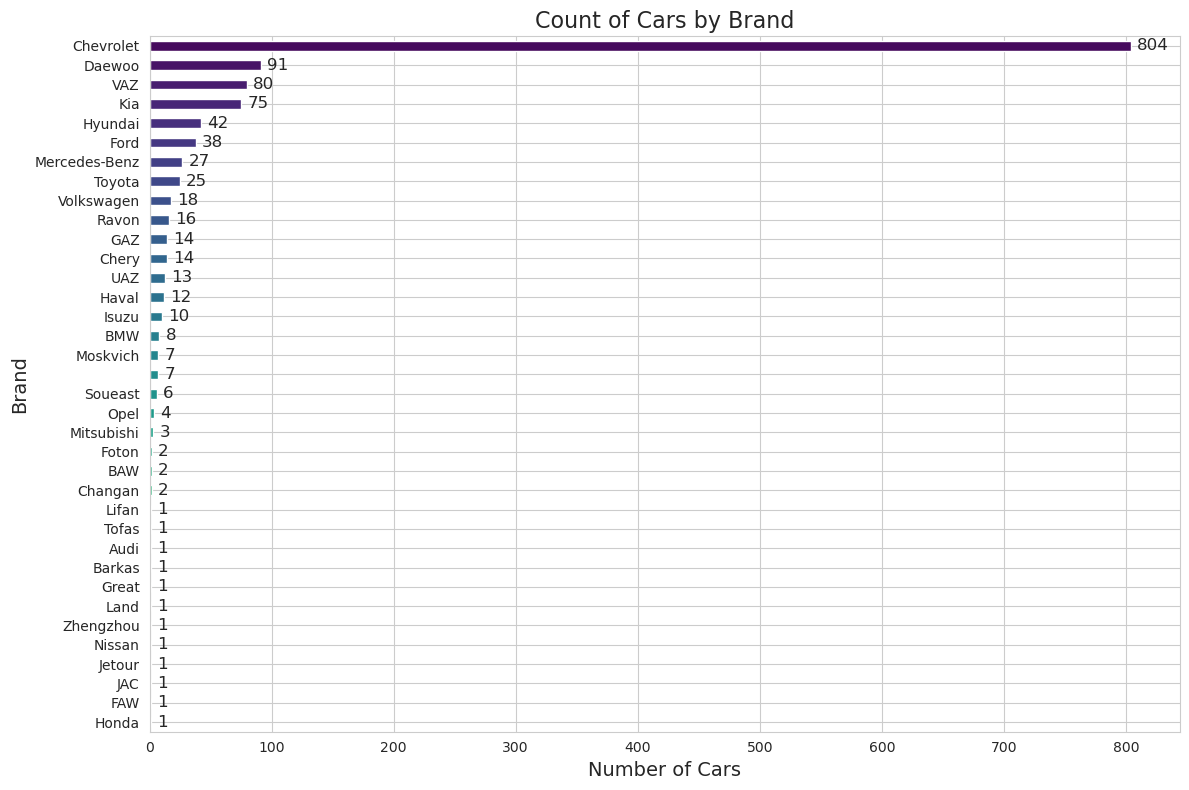

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

brand_counts = df['brand'].value_counts()

plt.figure(figsize=(12,8))
# Horizontal bar plot
brand_counts.plot(kind='barh', color=sns.color_palette("viridis", len(brand_counts)))

plt.title('Count of Cars by Brand', fontsize=16)
plt.xlabel('Number of Cars', fontsize=14)
plt.ylabel('Brand', fontsize=14)

plt.gca().invert_yaxis()  # highest count on top

# Add value labels at the end of each bar
for index, value in enumerate(brand_counts):
    plt.text(value + 5, index, str(value), va='center', fontsize=12)

plt.tight_layout()
plt.show()

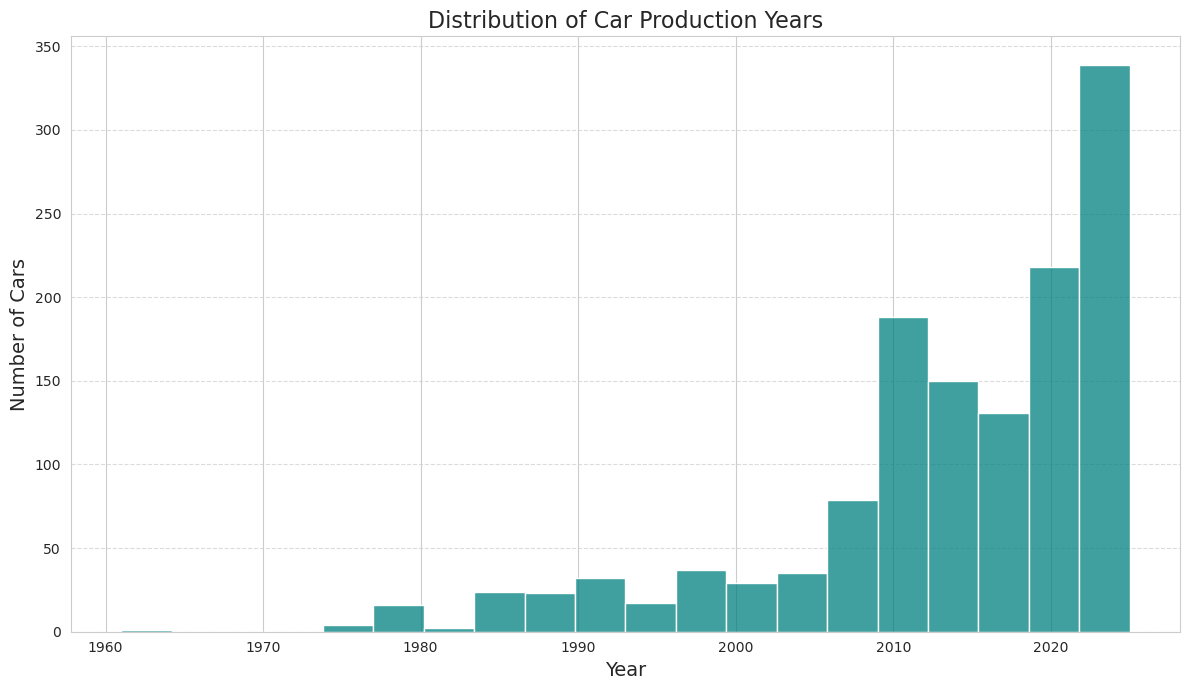

In [83]:
# histogramm of product year
plt.figure(figsize=(12,7))
df['Production_year'] = pd.to_datetime(df['Production_year'], errors='coerce')
years = df['Production_year'].dt.year.dropna().astype(int)

sns.histplot(years, bins=20, kde=False, color='teal')
plt.title('Distribution of Car Production Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

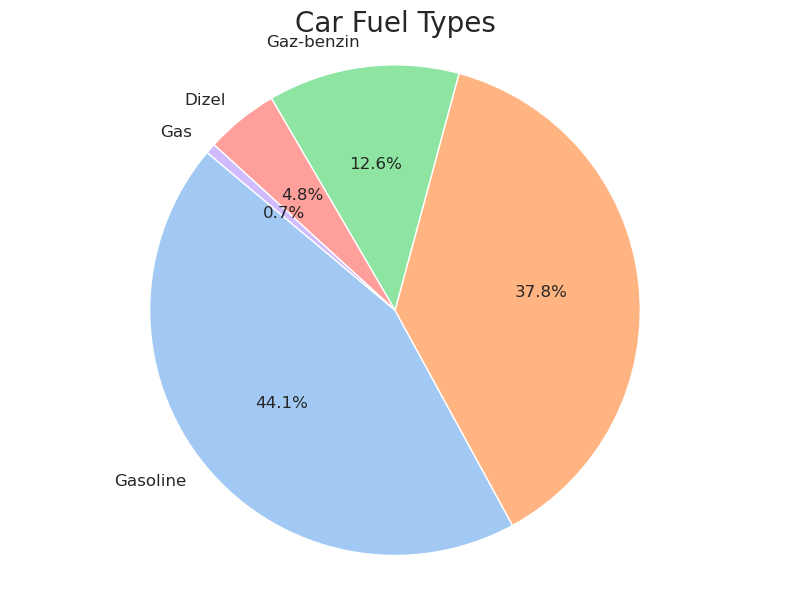

In [87]:
# Improved Pie Chart of Fuel Types
fuel_counts = df['fuel_type'].fillna('Unknown').value_counts()

plt.figure(figsize=(8,6))
colors = sns.color_palette('pastel')[0:len(fuel_counts)]

fuel_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 12})
plt.title('Car Fuel Types', fontsize=20)
plt.ylabel('')
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.tight_layout()
plt.show()

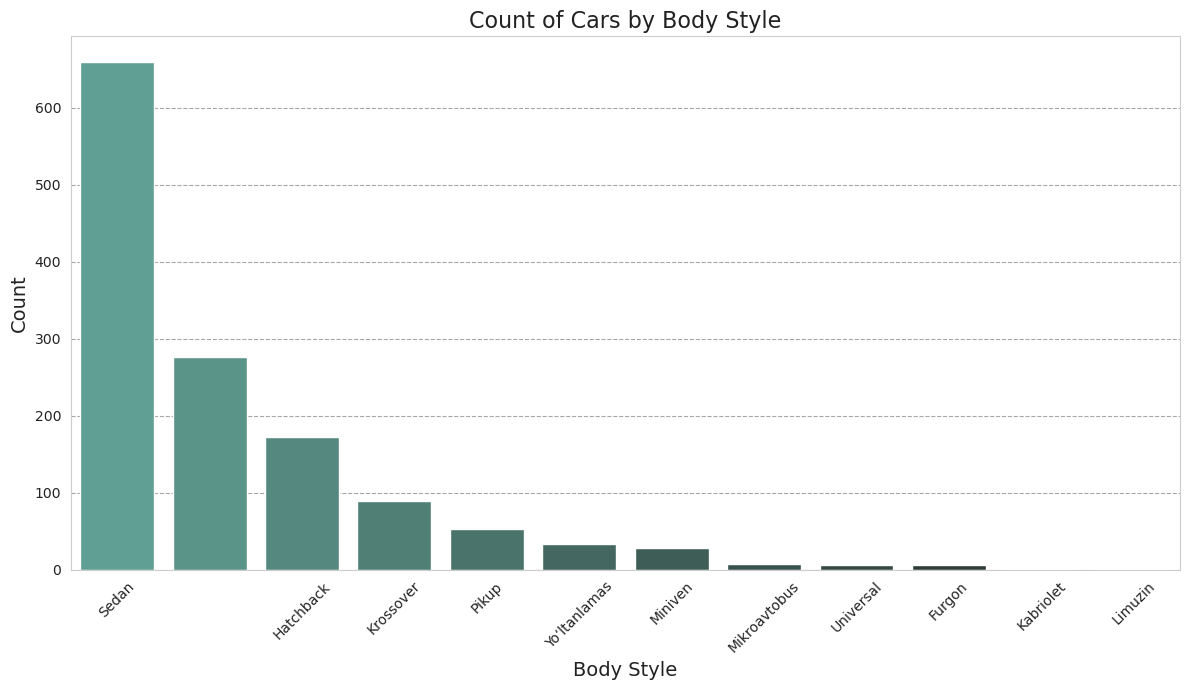

In [89]:
# The Count Plot of Body Style visualizes the frequency distribution of different car 
# body styles available in the datase

plt.figure(figsize=(12,7))
dark_palette = sns.color_palette("dark:#5A9_r", n_colors=len(df['Body_style'].unique()))

sns.countplot(data=df, x='Body_style', order=df['Body_style'].value_counts().index, palette=dark_palette)

plt.title('Count of Cars by Body Style', fontsize=16, color='#222222')
plt.xlabel('Body Style', fontsize=14, color='#222222')
plt.ylabel('Count', fontsize=14, color='#222222')
plt.xticks(rotation=45, color='#222222')
plt.yticks(color='#222222')
plt.grid(axis='y', linestyle='--', alpha=0.7, color='gray')

plt.tight_layout()
plt.show()


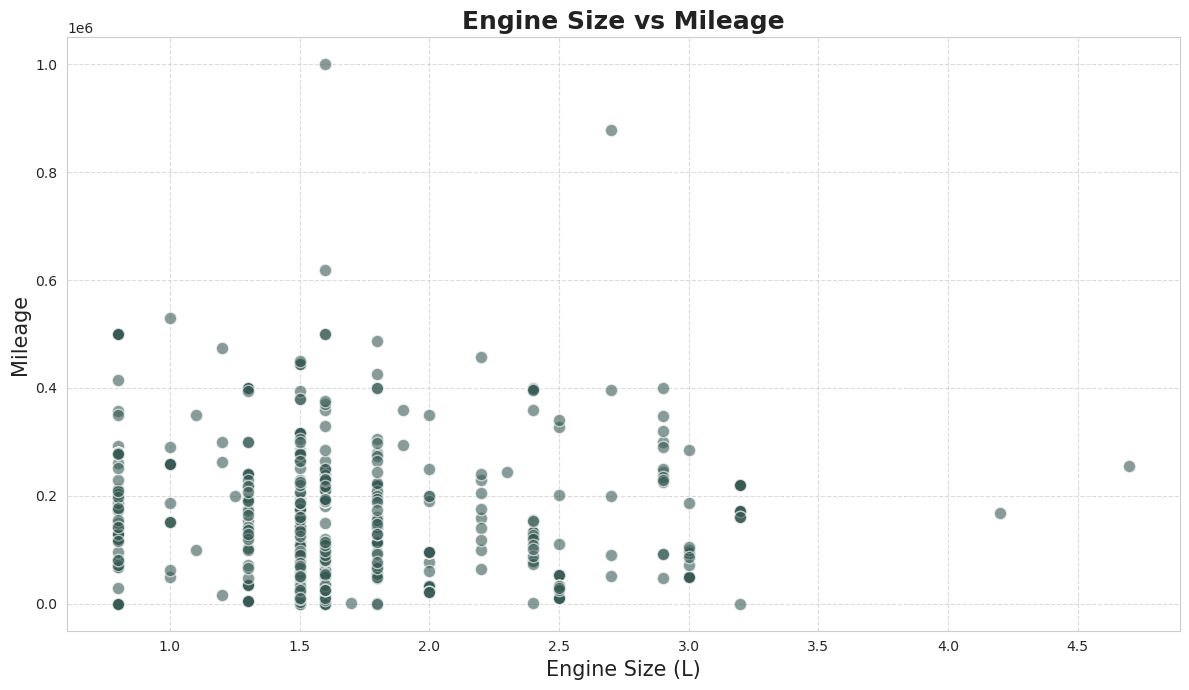

In [94]:
# Convert columns to numeric, forcing errors to NaN
df['engine_size'] = pd.to_numeric(df['engine_size'], errors='coerce')
df['Milage'] = pd.to_numeric(df['Milage'], errors='coerce')

# Drop rows where either is NaN
plot_df = df.dropna(subset=['engine_size', 'Milage'])

# Use seaborn color palette for dark purple tone
point_color = sns.color_palette("dark:#5A9_r")[3]

plt.figure(figsize=(12,7))
plt.scatter(
    plot_df['engine_size'], 
    plot_df['Milage'], 
    alpha=0.6, 
    color=point_color,    
    edgecolor='white', 
    s=80
)

plt.title('Engine Size vs Mileage', fontsize=18, fontweight='bold', color='#222222')
plt.xlabel('Engine Size (L)', fontsize=15, color='#222222')
plt.ylabel('Mileage', fontsize=15, color='#222222')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
